<H1> Problem </H>

Find a reasonable <b>(less crime rate and not too far from city center)</b> suburb to live in Melbourne

<H5> Discussion </H5>

Melbourne has been named the world’s most liveable city for seven years in a row [1]. In 2018, Melbourne performed best in healthcare, education and infrastructure. Melbourne not only maintained its score in stability but also gained points in culture and environment.

This makes Melbourne a natural choice:
<ul>
  <li> For people to live, work or study </li>
</ul>

Though, Melbourne is a very big city. There are two issues:

<ol>
<li> Firstly, all neighborhoods are not safe to live in due to high crime rates</li>
<li> Secondly, a neighborhood may be safe but it can be in a remote area. Which makes it less suitable to live </li>
</ol>


Someone, who is raised in Melbourne will know about it. But, that is not the case for people living in other Australian states, foreigners, or immigrants. It becomes important to find such information before renting or buying a house in a suburb of Melbourne. Because, the property agents do not always provide a complete information.  

Good suburbs will likely have less crime rate. At the same time, it will be good for suburb to have at-least one of the following nearby venues: 
<ul>
    <li> School </li>
    <li> Park </li>
    <li> Resturants </li>
    <li> Train Stations </li>
  </ul>

In this project, I will find top 10 suburbs of Melbourne which
<ol>
<li> Have least crime rate compared to others </li>
<li> Are not very far away from Melbourne City Center, such as within 40 KM </li>
<li> Have quite a few venues (i.e., around 40 with in radius of 3 KM) including schools, parks or train stations. The suburb with more schools or other venues will be considered better </li>
<li> Finally, I will cluster the venues based on categories and will highlight on the map using Folium package </li>
</ol>

<b>Please note that we are not analysing at the hosue prices in this project.</b>

Refereces
1. https://www.businessinsider.com.au/melbourne-liveable-city-vienna-2018-8?r=US&IR=T

<H5> Target Audience </H5>

This kind of project will suit to those people(especially young families), who are either 


<ul>
    <li> Relocating to Melbourne from the other parts of Australia </li>
    <li> or Immigrants. </li>
</ul>

The project will help them to determine a suitable neighborhood to move in. The project will give them top 10 suburbs based on various factors, such as less crime rate, and good number of near by venues (schools, parks, resturants and trains stations). We will also indicate the distance of suburb to the city center. 

All this information will help them to determine a reasonable suburb to settle down

<H1> Data Preparation </H1>

<h5>Crime Rates</h5>

We want to find a city with less crime rate. So, we need the crime rate statistics for suburbs of Melbourne city.

We can obtain crime rate statistics for Melbourne up to 2016 from the following link:

https://en.wikipedia.org/wiki/List_of_Melbourne_suburbs

I have downloaded the excel file and kept the relevant data for my work i.e., recorded offenses in each suburb for the last 5 years (2011-2016). Now, we can get the stats from the file as follows 


In [25]:
#Extracting Crime Stats for Melbourne
import pandas as pd
melbourneCrimeStatsDf= pd.read_excel("Data\CrimeStatsMelbourne.xlsx")
melbourneCrimeStatsDf.head()

Postcode  Apr 2011 - Mar 2012  Apr 2012 - Mar 2013  Apr 2013 - Mar 2014  \
0      3000                21467                24164                22369   
1      3002                 1022                  756                 1029   
2      3003                  436                  659                  557   
3      3006                 2070                 2100                 2262   
4      3008                  850                  942                  931   

   Apr 2014 - Mar 2015  Apr 2015 - Mar 2016  
0                22666                22337  
1                  719                  852  
2                  487                  610  
3                 2437                 3114  
4                 1575                 1450

<H5> Scrapping Melbourne Suburb Table from Wikipedia </h5>

In [15]:
# Extracting information from html web page (table)
import requests
from bs4 import BeautifulSoup

webPageLink= "https://en.wikipedia.org/wiki/List_of_Melbourne_suburbs"
responseObject = requests.get(webPageLink).text
soup = BeautifulSoup(responseObject, 'lxml')
suburbTable =soup.find('table',{'class':'wikitable sortable'})

I read the suburb names from the Wikipedia webpage. Then, I created a data frame to store the suburb names and the corresponding postal codes. The dataframe will look like this

In [37]:
# Read suburb postal code and names
rowData = soup.find_all("tr")

suburbInformation=[]
for item in rowData:
    try:
            
        #Ignoring the headers
        if item.find("th"):
            continue
        
        tags= item.findAll('td')
        suburbName = tags[0].text
        postalCode = tags[1].text
        suburbInformation.append([int(postalCode.strip()),suburbName ])
    except Exception as e:
        continue

suburbMelbourneDf = pd.DataFrame(suburbInformation, columns=['Postcode','SuburbName'])
suburbMelbourneDf.head()


Postcode  SuburbName
0      3081   Bellfield
1      3088  Briar Hill
2      3083    Bundoora
3      3084   Eaglemont
4      3095      Eltham

In [140]:
# We merge so that suburb names appear along side corresponding post codes in crimes table
finalDf= suburbMelbourneDf.merge(melbourneCrimeStatsDf,how='inner', on=['Postcode'])
finalDf.head()

Postcode          SuburbName  Apr 2011 - Mar 2012  Apr 2012 - Mar 2013  \
0      3081           Bellfield                 1383                 1637   
1      3081  Heidelberg Heights                 1383                 1637   
2      3081     Heidelberg West                 1383                 1637   
3      3088          Briar Hill                 1371                 1436   
4      3088       Greensborough                 1371                 1436   

   Apr 2013 - Mar 2014  Apr 2014 - Mar 2015  Apr 2015 - Mar 2016  
0                 1866                 1695                 2128  
1                 1866                 1695                 2128  
2                 1866                 1695                 2128  
3                 1576                 1618                 2449  
4                 1576                 1618                 2449

In [141]:
# Delete the empty cells (if we do not find any suburb name against postal code)
if finalDf.isnull().sum(axis=0).sum()==0:
    print("No Empty Cells")

No Empty Cells


Now, I will compute the mean and sum of crimes for all suburbs. I just keep that information for simplicity 

In [142]:
# Finding the mean of the crimes 
finalDf['MeanCrimes'] = finalDf.iloc[:,2:7].mean(axis=1)
finalDf['SumCrimes'] = finalDf.iloc[:,2:7].sum(axis=1)
finalDf.drop(['Apr 2011 - Mar 2012','Apr 2012 - Mar 2013','Apr 2013 - Mar 2014',\
              'Apr 2014 - Mar 2015','Apr 2015 - Mar 2016'],axis=1, inplace=True)
finalDf.reset_index(drop= True, inplace= True)
finalDf.head()

Postcode          SuburbName  MeanCrimes  SumCrimes
0      3081           Bellfield      1741.8       8709
1      3081  Heidelberg Heights      1741.8       8709
2      3081     Heidelberg West      1741.8       8709
3      3088          Briar Hill      1690.0       8450
4      3088       Greensborough      1690.0       8450

<b> Data Cleansing </b>

We can see that quite a few suburbs have similar psot codes. So, we need to group suburb names in a row and just have one crime satistics 

In [146]:
cleanedFinalDf=finalDf.groupby(['Postcode']).agg({'SuburbName': ', '.join, 'MeanCrimes':'first','SumCrimes':'first'}).reset_index()
cleanedFinalDf.head()

Postcode              SuburbName  MeanCrimes  SumCrimes
0      3000           Melbourne CBD     22600.6     113003
1      3002          East Melbourne       875.6       4378
2      3003          West Melbourne       549.8       2749
3      3006  Southbank, South Wharf      2396.6      11983
4      3008               Docklands      1149.6       5748

<h5> Geolocator to extract longitudes and latitudes for all suburbs </h5>

I used the Geolocator API to extract the latitude and longitudes for all suburbs. 
- I also extracted the distance in KM (using Haversine Formula) of a suburb from the city center 

In [148]:
# Extract location information for each suburb
from  geopy.geocoders import Nominatim
import numpy as np 
import math 

# Creating empy columns to start with
cleanedFinalDf["Latitude"] =  np.nan
cleanedFinalDf["Longitude"] =  np.nan

geolocator = Nominatim(user_agent="explorer_melboure")
i=0
# Use API to get the information
for value, postal_code in zip(cleanedFinalDf["SuburbName"],cleanedFinalDf["Postcode"]): 
    if (i%50)==0:
        print('Processed = %d'%i)
    suburbName = value
   
    #city ="%s,Victoria"%suburbName
    country ="Australia"
    try:
        if(math.isnan(cleanedFinalDf.iloc[i, cleanedFinalDf.columns.get_loc('Latitude')])): # If location does not exist
            suburbs = list()
            if suburbName.find(",")!=-1:
                suburbs = suburbName.split(",")
            else:
                suburbs.append(suburbName)
            
            location =list()
            # Finding the locations
            for eachSuburb in suburbs:
                loc = geolocator.geocode(eachSuburb +' , '+ str(postal_code)+' , '+country, timeout=100)
                location.append([loc.latitude, loc.longitude])
            
            # Stroing the location in data frame
            if len(location)==1:
                cleanedFinalDf.iloc[i, cleanedFinalDf.columns.get_loc('Latitude')]=location[0][0]
                cleanedFinalDf.iloc[i, cleanedFinalDf.columns.get_loc('Longitude')]=location[0][1]
            elif len(location)>1:
                tempDf= pd.DataFrame(location)
                tempDf.columns=['Latitude','Longitude']
                mean_lat, mean_long= find_mean_location(tempDf)
                cleanedFinalDf.iloc[i, cleanedFinalDf.columns.get_loc('Latitude')]=mean_lat
                cleanedFinalDf.iloc[i, cleanedFinalDf.columns.get_loc('Longitude')]=mean_long
        i+=1
    except Exception as e:
        print(str(e))
        
        
print("Completed")

Processed = 0
Processed = 50
Processed = 100
Processed = 150
Processed = 200
'NoneType' object has no attribute 'latitude'
'NoneType' object has no attribute 'latitude'
Processed = 250
Completed


In [132]:
# Compute the mean latitude and longitude from mulitple locations
import math

def find_mean_location(coords_df):
    x = 0.0
    y = 0.0
    z = 0.0

    for i, coord in coords_df.iterrows():
        latitude = math.radians(coord.Latitude)
        longitude = math.radians(coord.Longitude)

        x += math.cos(latitude) * math.cos(longitude)
        y += math.cos(latitude) * math.sin(longitude)
        z += math.sin(latitude)

    total = len(coords_df)

    x = x / total
    y = y / total
    z = z / total

    central_longitude = math.atan2(y, x)
    central_square_root = math.sqrt(x * x + y * y)
    central_latitude = math.atan2(z, central_square_root)
    
    return math.degrees(central_latitude),math.degrees(central_longitude)



Checking if there any null values i.e., latitude and longitudes cannot be found.
If yes then drop those rows. Finalise the data frame and save it as a csv file

In [151]:
# Any missing values dropped (can happen if suburb name is old or incorrect)
# and, we cannot get the latitude and longitude values
if cleanedFinalDf.isnull().sum().sum()!=0:
    print('Dropping empty rows')
    cleanedFinalDf.dropna(inplace= True)
print(cleanedFinalDf.isnull().sum())

# saving pandas frame to a csv file
cleanedFinalDf.to_csv("Data\melb_suburbs_locations.csv", index= False)


Postcode      0
SuburbName    0
MeanCrimes    0
SumCrimes     0
Latitude      0
Longitude     0
dtype: int64


In [152]:
cleanedFinalDf.shape

(272, 6)

In [153]:
cleanedFinalDf.head()

Postcode              SuburbName  MeanCrimes  SumCrimes   Latitude  \
0      3000           Melbourne CBD     22600.6     113003 -37.814182   
1      3002          East Melbourne       875.6       4378 -37.812498   
2      3003          West Melbourne       549.8       2749 -37.810448   
3      3006  Southbank, South Wharf      2396.6      11983 -37.825345   
4      3008               Docklands      1149.6       5748 -37.817542   

    Longitude  
0  144.959801  
1  144.985885  
2  144.920430  
3  144.956682  
4  144.939492

<b>Extracting the distance of each suburb from Melbourne City Center</b>

In [154]:
geolocator = Nominatim(user_agent="explorer")
loc = geolocator.geocode('Melbourne City Center, Melbourne, Australia', timeout=100)
melb_cc_latitude =loc.latitude
melb_cc_longitude =loc.longitude
print("Melbourne CBD Location")
print(melb_cc_latitude)
print(melb_cc_longitude)

Melbourne CBD Location
-37.8275581
144.979857223109


In [155]:
# We can use Haversine Formula to calculate the distance using latidues and longitudes
from math import radians, cos, sin, asin, sqrt
def haversine(lat1, lon1, lat2, lon2):
    R = 6372.8 # this is in miles.  For Earth radius in kilometers use 6372.8 km
    
    dLat = radians(lat2 - lat1)
    dLon = radians(lon2 - lon1)
    lat1 = radians(lat1)
    lat2 = radians(lat2)

    a = sin(dLat/2)**2 + cos(lat1)*cos(lat2)*sin(dLon/2)**2
    c = 2*asin(sqrt(a))

    return (R * c)



In [158]:
# Computing distance of each Suburb in KM from the city center
cleanedFinalDf["DistCityCenter"] =  np.nan
index=0
for eachLatitude, eachLongitude in zip(cleanedFinalDf["Latitude"],cleanedFinalDf["Longitude"]):
    distance = haversine(eachLatitude,eachLongitude,melb_cc_latitude,melb_cc_longitude)
    cleanedFinalDf.iloc[index, cleanedFinalDf.columns.get_loc('DistCityCenter')]=distance
    index+=1

We only conisder those suburbs <b> which are with in 150 Km from the city center </b>

In [171]:
# Ignoring remote suburbs
melbourneDf = cleanedFinalDf[cleanedFinalDf['DistCityCenter']<=150]

# Updating the saved CSV file
suburbMelbourneDf.to_csv("Data\melb_suburbs_dist.csv", index= False)

In [168]:
melbourneDf.shape

(256, 7)

## Foursquare API

I will use Foursquare API to extract the information about venues. I will extract the following information (features) using Foursquare API

<H4> Feature # 1 - School Information </H4>

I will get the near by schools information for a neighborhood with in 3 KM
I then store the inormation as frequency of schools

In [70]:
# Setting up the Foursquare API
radius = 3000
CLIENT_ID = '' # your Foursquare ID
CLIENT_SECRET = '' # your Foursquare Secret
VERSION = '20190815'
LIMIT = 50

In [16]:
import requests

def search_school(Df):
    # Searching the school information
    search_query = 'School'

    # Initialising column with zero values
    Df["Schools"]= 0

    row_index=0
    # Going through each suburb
    for eachSubrub,eachLatitude, eachLongitude in zip(Df["SuburbName"],Df["Latitude"], Df["Longitude"]):
        if (row_index%50)==0:
            print(row_index)
        url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, eachLatitude, eachLongitude, VERSION, search_query, radius, LIMIT)
        results = requests.get(url).json()
   
        # Extract the total number of outputs returned by query
        try:
            count = len(results['response']['venues'])
        except:
            continue

        output = list()
        # Extracting each venue information
        for i in range(0, count):
            try:
                school_name= results['response']['venues'][i]['name']
                school_category_name =results['response']['venues'][i]['categories'][0]['name']
            except:
                continue
            # Ignoring wrong outputs, such as studios, buses information etc
            if (school_category_name.find("School")>=-0 or \
            school_category_name.find("University")>=0) and \
            school_category_name.find("Swim")==-1:
                output.append([school_name, school_category_name])

        Df.iloc[row_index, Df.columns.get_loc('Schools')]=len(output)
        row_index+=1
        #break
    return Df

In [176]:
melbourneDf= search_school(melbourneDf.copy())
melbourneDf.head()

0
50
100
150
200
250


Postcode              SuburbName  MeanCrimes  SumCrimes   Latitude  \
0      3000           Melbourne CBD     22600.6     113003 -37.814182   
1      3002          East Melbourne       875.6       4378 -37.812498   
2      3003          West Melbourne       549.8       2749 -37.810448   
3      3006  Southbank, South Wharf      2396.6      11983 -37.825345   
4      3008               Docklands      1149.6       5748 -37.817542   

    Longitude  DistCityCenter  Schools  
0  144.959801        2.306228       25  
1  144.985885        1.756813       22  
2  144.920430        5.557517       30  
3  144.956682        2.050896       25  
4  144.939492        3.717285       24

In [177]:
melbourneDf.to_csv("Data\melb_suburbs_schools.csv", index= False)

<H4> Feature # 2 - Park Information </H4>

We will get the near by parks information for a neighborhood with in 3 KM

In [17]:
import requests

def search_park(Df):
    # Searching the park information
    search_query = 'Park'

    # Initialising column with zero values
    Df["Parks"]= 0

    row_index=0
    # Going through each suburb
    for eachSubrub,eachLatitude, eachLongitude in zip(Df["SuburbName"],Df["Latitude"], Df["Longitude"]):

        url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, eachLatitude, eachLongitude, VERSION, search_query, radius, LIMIT)
        results = requests.get(url).json()

        # Extract the total number of outputs returned by query
        try:
            count = len(results['response']['venues'])
        except:
            continue
        output = list()
        # Extracting each venue information
        for i in range(0, count):
            try:
                park_name= results['response']['venues'][i]['name']
                park_category_name =results['response']['venues'][i]['categories'][0]['name']
            except:
                continue

            # Ignoring wrong outputs i.e., only accepting Parks and Playlands
            if park_category_name=="Park" or \
            park_category_name== "Playground":
                output.append([park_name, park_category_name])

        Df.iloc[row_index, Df.columns.get_loc('Parks')]=len(output)
        row_index+=1

    return Df


In [179]:
# Extract Parks
melbourneDf= search_park(melbourneDf)
melbourneDf.head()

Postcode              SuburbName  MeanCrimes  SumCrimes   Latitude  \
0      3000           Melbourne CBD     22600.6     113003 -37.814182   
1      3002          East Melbourne       875.6       4378 -37.812498   
2      3003          West Melbourne       549.8       2749 -37.810448   
3      3006  Southbank, South Wharf      2396.6      11983 -37.825345   
4      3008               Docklands      1149.6       5748 -37.817542   

    Longitude  DistCityCenter  Schools  Parks  
0  144.959801        2.306228       25      9  
1  144.985885        1.756813       22      9  
2  144.920430        5.557517       30     23  
3  144.956682        2.050896       25     10  
4  144.939492        3.717285       24     11

In [180]:
# Save to disk
melbourneDf.to_csv("Data\melb_suburbs_parks.csv", index= False)

<H4> Feature # 3 - Train Station </H4>

We will get the near by train stations information for a neighborhood with in 3 KM

In [18]:
import requests

def search_station(Df):
    # Searching the school information
    search_query = 'Train Station'

    # Initialising column with zero values
    Df["Stations"]= 0

    row_index=0
    # Going through each suburb
    for eachSubrub,eachLatitude, eachLongitude in zip(Df["SuburbName"],Df["Latitude"], Df["Longitude"]):

        url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, eachLatitude, eachLongitude, VERSION, search_query, radius, LIMIT)
        results = requests.get(url).json()
        # Extract the total number of outputs returned by query
        try:
            count = len(results['response']['venues'])
        except:
            continue
        output = list()
        # Extracting each venue information
        for i in range(0, count):
            try:
                station_name= results['response']['venues'][i]['name']
                station_category_name =results['response']['venues'][i]['categories'][0]['name']
            except:
                continue

            # Ignoring wrong outputs i.e., only accepting Parks and Playlands
            if station_category_name.strip()=="Train Station":
                output.append([station_name, station_category_name])
        Df.iloc[row_index, Df.columns.get_loc('Stations')]=len(output)
        row_index+=1
        #break
    return Df

In [184]:
# Extract station information
melbourneDf= search_station(melbourneDf)

In [185]:
# Save to disc
melbourneDf.to_csv("Data\melb_suburbs_stations.csv", index= False)

In [186]:
melbourneDf.head()

Postcode              SuburbName  MeanCrimes  SumCrimes   Latitude  \
0      3000           Melbourne CBD     22600.6     113003 -37.814182   
1      3002          East Melbourne       875.6       4378 -37.812498   
2      3003          West Melbourne       549.8       2749 -37.810448   
3      3006  Southbank, South Wharf      2396.6      11983 -37.825345   
4      3008               Docklands      1149.6       5748 -37.817542   

    Longitude  DistCityCenter  Schools  Parks  Stations  
0  144.959801        2.306228       25      9        15  
1  144.985885        1.756813       22      9        13  
2  144.920430        5.557517       30     23        13  
3  144.956682        2.050896       25     10         9  
4  144.939492        3.717285       24     11         9

<H4> Feature # 4 - Resturants </H4>

We will get the near by resturants information for a neighborhood with in 3 KM

In [19]:
import requests

def search_restaurant(Df):
    # Searching the school information
    search_query = 'Restaurant'

    # Initialising column with zero values
    Df["Restaurants"]= 0

    row_index=0
    # Going through each suburb
    for eachSubrub,eachLatitude, eachLongitude in zip(Df["SuburbName"],Df["Latitude"], Df["Longitude"]):

        url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, eachLatitude, eachLongitude, VERSION, search_query, radius, LIMIT)
        results = requests.get(url).json()

        # Extract the total number of outputs returned by query
        try:
            count = len(results['response']['venues'])
        except:
            continue
        output = list()
        # Extracting each venue information
        for i in range(0, count):
            try:
                restaurant_name= results['response']['venues'][i]['name']
                restaurant_category_name =results['response']['venues'][i]['categories'][0]['name']
            except:
                continue

            # Ignoring wrong outputs i.e., only accepting Parks and Playlands
            if restaurant_category_name.strip().find("Restaurant")>=0:
                output.append([restaurant_name, restaurant_category_name])
        Df.iloc[row_index, Df.columns.get_loc('Restaurants')]=len(output)
        row_index+=1
        #break
    return Df

In [188]:
# Extract restaruant information
melbourneDf= search_restaurant(melbourneDf)
melbourneDf.head()

Postcode              SuburbName  MeanCrimes  SumCrimes   Latitude  \
0      3000           Melbourne CBD     22600.6     113003 -37.814182   
1      3002          East Melbourne       875.6       4378 -37.812498   
2      3003          West Melbourne       549.8       2749 -37.810448   
3      3006  Southbank, South Wharf      2396.6      11983 -37.825345   
4      3008               Docklands      1149.6       5748 -37.817542   

    Longitude  DistCityCenter  Schools  Parks  Stations  Restaurants  
0  144.959801        2.306228       25      9        15           43  
1  144.985885        1.756813       22      9        13           41  
2  144.920430        5.557517       30     23        13           42  
3  144.956682        2.050896       25     10         9           45  
4  144.939492        3.717285       24     11         9           42

In [189]:
# Updating the saved CSV file
melbourneDf.to_csv("Data\melb_suburbs_restaurants.csv", index= False)

We can use all above features to do analysis for our project

<H1> Analysis </H1>

We can read the stats from the save file on the disc

In [1]:
# Laoding files from disc. Saves time
import pandas as pd
melbourneDf= pd.read_csv("Data\melb_suburbs_restaurants.csv")
melbourneDf.head()

Postcode              SuburbName  MeanCrimes  SumCrimes   Latitude  \
0      3000           Melbourne CBD     22600.6     113003 -37.814182   
1      3002          East Melbourne       875.6       4378 -37.812498   
2      3003          West Melbourne       549.8       2749 -37.810448   
3      3006  Southbank, South Wharf      2396.6      11983 -37.825345   
4      3008               Docklands      1149.6       5748 -37.817542   

    Longitude  DistCityCenter  Schools  Parks  Stations  Restaurants  
0  144.959801        2.306228       25      9        15           43  
1  144.985885        1.756813       22      9        13           41  
2  144.920430        5.557517       30     23        13           42  
3  144.956682        2.050896       25     10         9           45  
4  144.939492        3.717285       24     11         9           42

### Correlation map

In [2]:
# Potential outlier or wrong value. Removing it
melbourneDf= melbourneDf[melbourneDf['MeanCrimes']<20000]

In [3]:
myCorrelationDf =melbourneDf.drop(['Postcode','Latitude','Longitude'], axis=1)
corr = myCorrelationDf.corr()
corr.style.background_gradient(cmap='coolwarm')

We cannot draw any conclusions using the above correlation matrix. So, lets try out the regression plots

### Regression Plots

<b> Mean and Sum Crimes Vs Dist City Center </b>

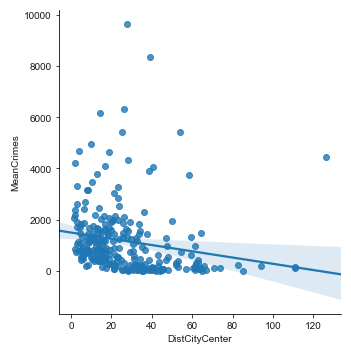

In [4]:
%matplotlib inline
# Let's visual the mean crimes and distance to city center
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.lmplot(x="DistCityCenter",y="MeanCrimes", data=melbourneDf)
sns.set(style="whitegrid")
plt.style.use(u'ggplot')


In [18]:
%matplotlib inline
# Let's visual the sum crimes and distance to city center
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(10,10))
sns.lmplot(x="DistCityCenter",y="SumCrimes", data=melbourneDf)
sns.set(style="whitegrid")
plt.style.use(u'ggplot')
plt.show()

<Figure size 720x720 with 0 Axes>

<b> Mean Crimes vs Schools </b>

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.lmplot(x="Schools",y="MeanCrimes", data=melbourneDf)
sns.set(style="whitegrid")
plt.style.use(u'ggplot')
plt.title("Crimes vs Schools")
plt.show()

<b> Mean Crimes vs Parks </b>

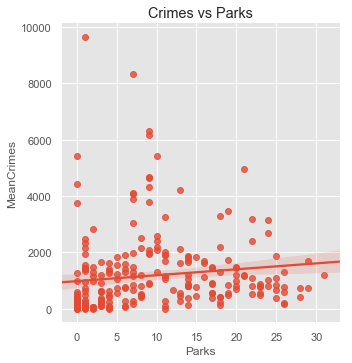

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.lmplot(x="Parks",y="MeanCrimes", data=melbourneDf)
sns.set(style="whitegrid")
plt.style.use(u'ggplot')
plt.title("Crimes vs Parks")
plt.show()

<b> Mean Crimes vs Stations </b>

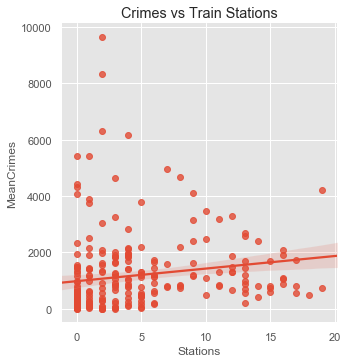

In [7]:
sns.lmplot(x="Stations",y="MeanCrimes", data=melbourneDf)
sns.set(style="whitegrid")
plt.style.use(u'ggplot')
plt.title("Crimes vs Train Stations")
plt.show()

<b> Mean Crimes vs Restaurants </b>

In [8]:
sns.lmplot(x="Restaurants",y="MeanCrimes", data=melbourneDf)
sns.set(style="whitegrid")
plt.style.use(u'ggplot')
plt.title("Crimes vs Restaurants")
plt.show()

<b> Features vs Distance City Center </b>

<Figure size 864x864 with 0 Axes>

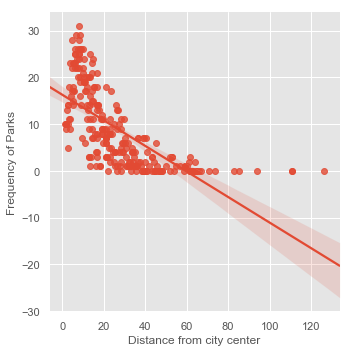

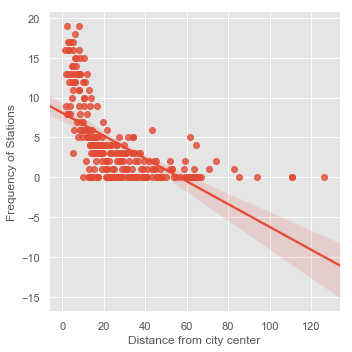

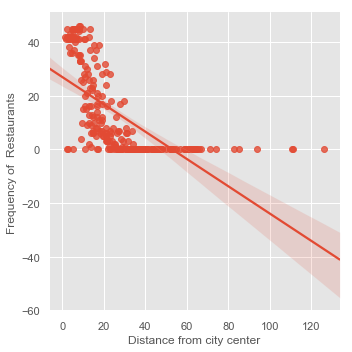

In [9]:
plt.figure(figsize=(12,12))
sns.lmplot(x="DistCityCenter", y="Schools", data=melbourneDf, palette="muted")
plt.xlabel("Distance from city center")
plt.ylabel("Frequency of Schools")

sns.lmplot(x="DistCityCenter", y="Parks", data=melbourneDf, palette="muted")
plt.xlabel("Distance from city center")
plt.ylabel("Frequency of Parks")


sns.lmplot(x="DistCityCenter", y="Stations", data=melbourneDf, palette="muted")
plt.xlabel("Distance from city center")
plt.ylabel("Frequency of Stations")

sns.lmplot(x="DistCityCenter", y="Restaurants", data=melbourneDf, palette="muted")
plt.xlabel("Distance from city center")
plt.ylabel("Frequency of  Restaurants")


plt.show()

#### Box Plots 

### Use the concept of binning to genreate box plots

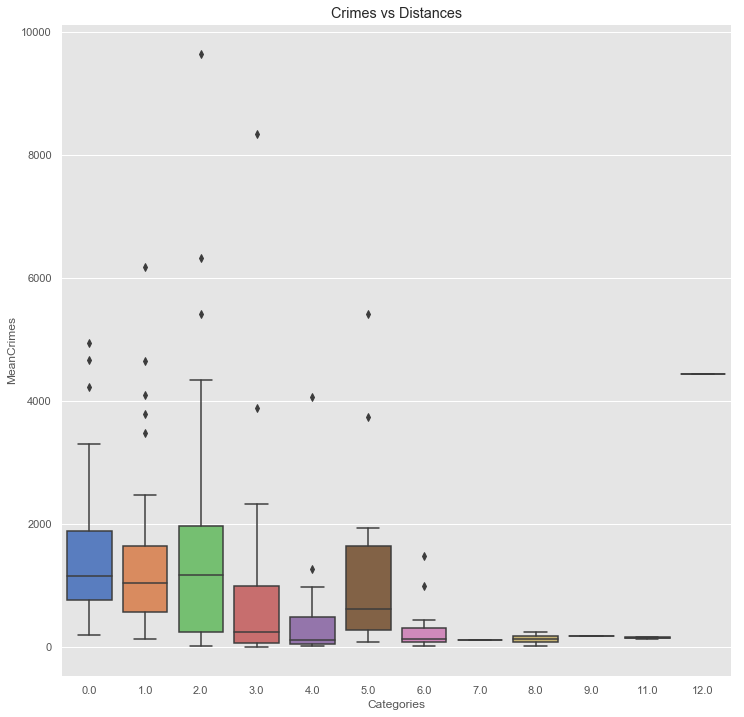

In [11]:
# Let's divide above graph in bins, such as each bin represents crimes with in 10KM range
def bin_distance(x):
    val = x//10
    return val

def generate_label(x):
    return "%d - %d Km"%(x*10,(x+1)*10)
        
tempdf= melbourneDf.copy()
tempdf['Category']= tempdf['DistCityCenter'].apply(bin_distance)
tempdf['Labels']= tempdf['Category'].apply(generate_label)
plt.figure(figsize=(12,12))
ax = sns.boxplot(x="Category", y="MeanCrimes", data=tempdf, palette="muted")
plt.xlabel("Categories")
plt.title("Crimes vs Distances")
plt.show()

<b> Schools </b>

In [12]:
plt.figure(figsize=(12,12))
ax = sns.boxplot(x="Category", y="Schools", data=tempdf, palette="muted")
plt.xlabel("Categoires")
plt.xlabel("Schools")
plt.title("Schools vs Distances")
plt.show()

<b> Parks box plot </b>

In [13]:
plt.figure(figsize=(12,12))
ax = sns.boxplot(x="Category", y="Parks", data=tempdf, palette="muted")
plt.xlabel("Categories")
plt.ylabel("Parks")
plt.title("Parks vs Distances")
plt.show()

<b> Stations Box Plot </b>

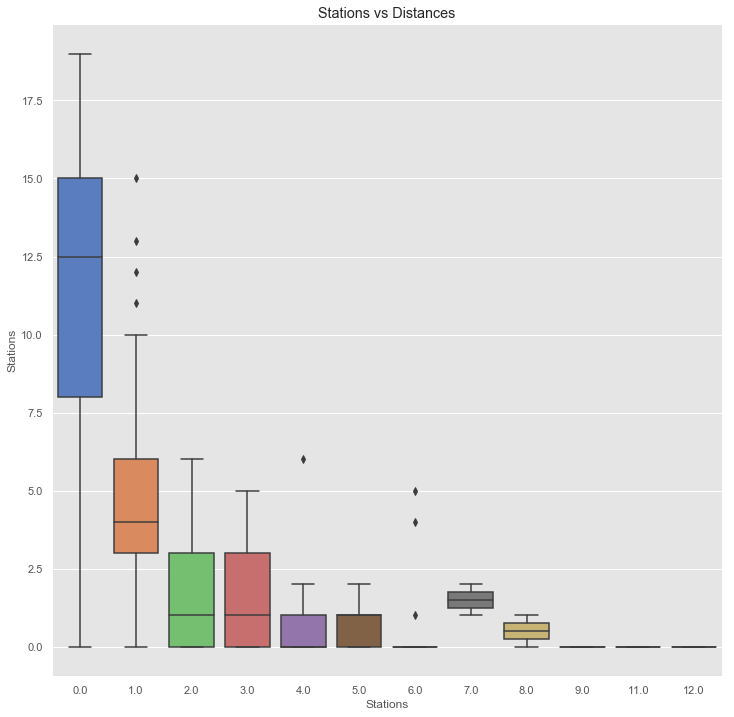

In [14]:
plt.figure(figsize=(12,12))
ax = sns.boxplot(x="Category", y="Stations", data=tempdf, palette="muted")
plt.xlabel("Categories")
plt.xlabel("Stations")
plt.title("Stations vs Distances")
plt.show()

<b> Restaurants box plot </b>

In [15]:
plt.figure(figsize=(12,12))
ax = sns.boxplot(x="Category", y="Restaurants", data=tempdf, palette="muted")
plt.xlabel("Categories")
plt.xlabel("Categories")
plt.title("Restaurants vs Distances")
plt.show()

The crime rate decreases as we move away from the cty.

<b>However, the frequency of venues decrease. One potential reason is that we are searching in 3 km radius. If we increase the radius then we may find more venies. In other words, people living in far suburbs will have to drive more compared to the people living near to the city center/ </b>

To test this hypothesis, I again searched for the venues around each suburb using 7 km radius. I did not change the other settings, such as limit.

In [20]:
# Setting up the Foursquare API
radius = 7000
CLIENT_ID = '' # your Foursquare ID
CLIENT_SECRET = '' # your Foursquare Secret
VERSION = '20190815'
LIMIT = 50

# Search schools with in 10 KM Radius
tempdf_7km = tempdf.copy()
tempdf_7km = search_school(tempdf_7km)
tempdf_7km = search_park(tempdf_7km)
tempdf_7km = search_station(tempdf_7km)
tempdf_7km = search_restaurant(tempdf_7km)

0
50
100
150
200
250


In [58]:
tempdf_7km.head()
print(tempdf_7km.isnull().sum())

Postcode          0
SuburbName        0
MeanCrimes        0
SumCrimes         0
Latitude          0
Longitude         0
DistCityCenter    0
Schools           0
Parks             0
Stations          0
Restaurants       0
Category          0
Labels            0
dtype: int64


Text(0.5,1,'Frequencies of Schools')

<Figure size 864x864 with 0 Axes>

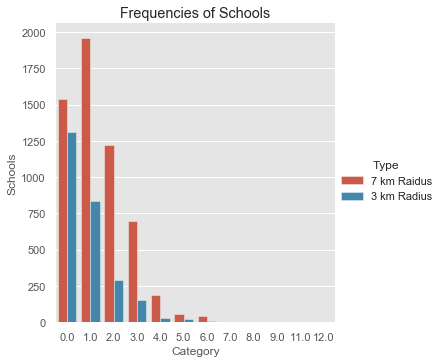

In [76]:
# Generating the school plots

import seaborn as sns

tempdf_7km_grouped =tempdf_7km.groupby('Category').sum()
tempdf_7km_grouped.reset_index(inplace= True)
tempdf_7km_grouped['Type']="7 km Raidus"

tempdf_grouped =tempdf.groupby('Category').sum()
tempdf_grouped=tempdf_grouped.reset_index()
tempdf_grouped['Type'] = "3 km Radius"

tempdf_grouped_merge=pd.concat([tempdf_7km_grouped, tempdf_grouped], axis= 0)
tempdf_grouped_merge.head()

# Schools with in 7 Km radius for each suburb
plt.figure(figsize=(12,12))
sns.catplot(x='Category', y='Schools', hue='Type', data=tempdf_grouped_merge, kind='bar')
plt.title("Frequencies of Schools")
#plt.show()

Text(0.5,1,'Frequencies of Parks')

<Figure size 864x864 with 0 Axes>

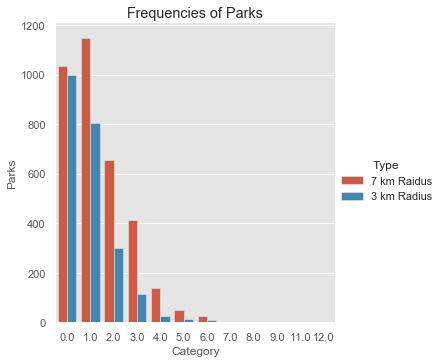

In [77]:
# Generating the park plots

# Parks with in 7 Km radius for each suburb
plt.figure(figsize=(12,12))
sns.catplot(x='Category', y='Parks', hue='Type', data=tempdf_grouped_merge, kind='bar')
plt.title("Frequencies of Parks")
#plt.show()

Text(0.5,1,'Frequencies of Stations')

<Figure size 864x864 with 0 Axes>

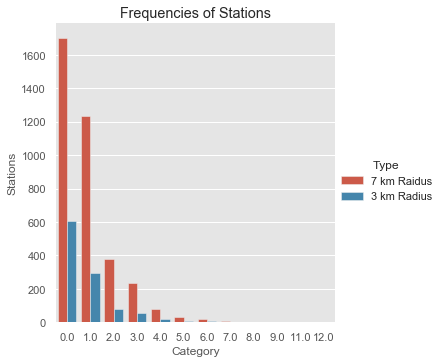

In [78]:
# Generating the station plots

# Parks with in 7 Km radius for each suburb
plt.figure(figsize=(12,12))
sns.catplot(x='Category', y='Stations', hue='Type', data=tempdf_grouped_merge, kind='bar')
plt.title("Frequencies of Stations")
#plt.show()

Text(0.5,1,'Frequencies of Restaurants')

<Figure size 864x864 with 0 Axes>

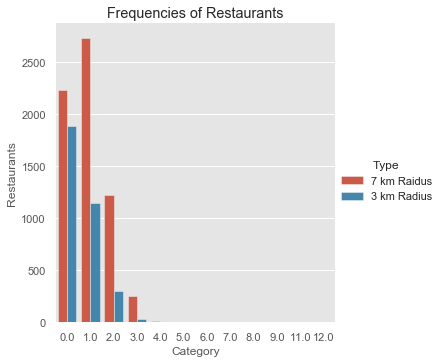

In [79]:
# Generating the restaurants plots

# Parks with in 7 Km radius for each suburb
plt.figure(figsize=(12,12))
sns.catplot(x='Category', y='Restaurants', hue='Type', data=tempdf_grouped_merge, kind='bar')
plt.title("Frequencies of Restaurants")
#plt.show()

# Results

So, I have done all the necessary analysis. It's time to find the best suburb to live

### Find the safest suburbs 40 - 70 km 

In [2]:
melbourneDf.head()

Postcode              SuburbName  MeanCrimes  SumCrimes   Latitude  \
0      3000           Melbourne CBD     22600.6     113003 -37.814182   
1      3002          East Melbourne       875.6       4378 -37.812498   
2      3003          West Melbourne       549.8       2749 -37.810448   
3      3006  Southbank, South Wharf      2396.6      11983 -37.825345   
4      3008               Docklands      1149.6       5748 -37.817542   

    Longitude  DistCityCenter  Schools  Parks  Stations  Restaurants  
0  144.959801        2.306228       25      9        15           43  
1  144.985885        1.756813       22      9        13           41  
2  144.920430        5.557517       30     23        13           42  
3  144.956682        2.050896       25     10         9           45  
4  144.939492        3.717285       24     11         9           42

In [3]:
# Extract all data from 40-60 KM in range
searchRangeDf =melbourneDf[(melbourneDf['DistCityCenter']>=40) & (melbourneDf['DistCityCenter']<=70)]

In [4]:
searchRangeDf.shape

(45, 11)

In [5]:
bestSuburbsDf = searchRangeDf.sort_values(by=['MeanCrimes'], ascending=True)
bestSuburbsDf.reset_index(inplace= True, drop=True)
bestSuburbsDf.head(5)

Postcode                     SuburbName  MeanCrimes  SumCrimes   Latitude  \
0      3891              Koo Wee Rup North         6.8         34 -38.195056   
1      3920                  HMAS Cerberus        10.4         52 -38.392347   
2      3928                     Main Ridge        11.2         56 -38.193810   
3      3430                    Clarkefield        20.0        100 -37.465415   
4      3916  Merricks, Point Leo, Shoreham        32.6        163 -38.352358   

    Longitude  DistCityCenter  Schools  Parks  Stations  Restaurants  
0  145.173962       44.273578        3      2         2            0  
1  145.172650       65.045797        0      0         0            0  
2  145.095732       41.983425        3      1         2            0  
3  144.769603       44.332088        0      0         1            0  
4  145.202950       61.551920        2      0         5            0

In [6]:
# Identifying worse suburbs
worseSuburbsDf=melbourneDf.sort_values(by=['MeanCrimes'], ascending= False)
worseSuburbsDf.reset_index(inplace= True, drop=True)
worseSuburbsDf.head()

Postcode                                         SuburbName  MeanCrimes  \
0      3000                                      Melbourne CBD     22600.6   
1      3175  Dandenong, Dandenong North, Dandenong South, B...      9649.4   
2      3199                         Frankston, Frankston South      8345.6   
3      3030  Derrimut, Point Cook, Werribee, Werribee South...      6321.0   
4      3020    Albion, Sunshine, Sunshine North, Sunshine West      6172.8   

   SumCrimes   Latitude   Longitude  DistCityCenter  Schools  Parks  Stations  \
0     113003 -37.814182  144.959801        2.306228       25      9        15   
1      48247 -38.004928  145.205537       27.952748        4      1         2   
2      41728 -38.160488  145.128222       39.247771       13      7         2   
3      31605 -37.912310  144.698509       26.440646        4      9         2   
4      30864 -37.782001  144.824409       14.570361        8      9         4   

   Restaurants  
0           43  
1           17  
2            0  
3            0  
4           13

In [7]:
# Saving suburbs on a CSV
worseSuburbsDf.to_csv("Data\\worse_suburbs.csv", index= False)
bestSuburbsDf.to_csv("Data\\best_suburbs.csv", index= False)

## Plot suburbs on maps

In [8]:
import collections
from collections import namedtuple

def get_bearing(p1, p2):
    
    '''
    Returns compass bearing from p1 to p2
    
    Parameters
    p1 : namedtuple with lat lon
    p2 : namedtuple with lat lon
    
    Return
    compass bearing of type float
    
    Notes
    Based on https://gist.github.com/jeromer/2005586
    '''
    
    long_diff = np.radians(p2.lon - p1.lon)
    
    lat1 = np.radians(p1.lat)
    lat2 = np.radians(p2.lat)
    
    x = np.sin(long_diff) * np.cos(lat2)
    y = (np.cos(lat1) * np.sin(lat2) 
        - (np.sin(lat1) * np.cos(lat2) 
        * np.cos(long_diff)))
    bearing = np.degrees(np.arctan2(x, y))
    
    # adjusting for compass bearing
    if bearing < 0:
        return bearing + 360
    return bearing

def get_arrows(locations, color='green', size=10, n_arrows=1):
    
    '''
    Get a list of correctly placed and rotated 
    arrows/markers to be plotted
    
    Parameters
    locations : list of lists of lat lons that represent the 
                start and end of the line. 
                eg [[41.1132, -96.1993],[41.3810, -95.8021]]
    arrow_color : default is 'blue'
    size : default is 6
    n_arrows : number of arrows to create.  default is 3
    Return
    list of arrows/markers
    '''
    
    Point = namedtuple('Point', field_names=['lat', 'lon'])
    
    # creating point from our Point named tuple
    p1 = Point(locations[0][0], locations[0][1])
    p2 = Point(locations[1][0], locations[1][1])
    
    # getting the rotation needed for our marker.  
    # Subtracting 90 to account for the marker's orientation
    # of due East(get_bearing returns North)
    rotation = get_bearing(p1, p2) - 90
    
    # get an evenly space list of lats and lons for our arrows
    # note that I'm discarding the first and last for aesthetics
    # as I'm using markers to denote the start and end
    arrow_lats = np.linspace(p1.lat, p2.lat, n_arrows + 2)[1:n_arrows+1]
    arrow_lons = np.linspace(p1.lon, p2.lon, n_arrows + 2)[1:n_arrows+1]
    
    arrows = []
    
    #creating each "arrow" and appending them to our arrows list
    for points in zip(arrow_lats, arrow_lons):
        arrows.append(folium.RegularPolygonMarker(location=points, 
                      fill_color='green',fill=True, fill_opacity=0.7,color='green',number_of_sides=3, 
                      radius=size, rotation=rotation))
    return arrows



In [12]:
import folium
import matplotlib.cm as cm
import matplotlib.colors as colors
from  geopy.geocoders import Nominatim
import numpy as np

geolocator = Nominatim(user_agent="explorer")
loc = geolocator.geocode('Melbourne City Center, Melbourne, Australia', timeout=100)
melb_cc_latitude =loc.latitude
melb_cc_longitude =loc.longitude

# create map
map = folium.Map(location=[melb_cc_latitude, melb_cc_longitude], zoom_start=8)

# set color scheme for the clusters
x = np.arange(10)
ys = [i + x + (i*x)**2 for i in range(10)]
colors_array = cm.tab10(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []

i=0
for lat, lon, poi, dist in zip(bestSuburbsDf['Latitude'], bestSuburbsDf['Longitude'],\
                               bestSuburbsDf['SuburbName'], bestSuburbsDf['DistCityCenter']):
    label = folium.Popup(str(poi), parse_html=True,fill_color=rainbow[i])
    folium.Marker( location=[lat, lon], popup='%s [Distance from CBD=%0.3f]'%(poi,dist),
                      color=rainbow[7], fill=True, 
                      fill_color=rainbow[7],fill_opacity=0.7).add_to(map)

    if i==0:
        folium.Marker(location=[lat,lon], icon=folium.Icon(color='green')).add_to(map)
    p1= [melb_cc_latitude, melb_cc_longitude]
    p2= [lat, lon]
    folium.PolyLine(locations=[p1,p2 ], color='green').add_to(map)
    arrows = get_arrows(locations=[p1, p2], n_arrows=1)
    for arrow in arrows:
        arrow.add_to(map)
    i+=1
    if i==5:
        break


map

In [14]:
# Worse Suburbs
# Displaying Worse Suburbs
geolocator = Nominatim(user_agent="explorer")
loc = geolocator.geocode('Melbourne City Center, Melbourne, Australia', timeout=100)
melb_cc_latitude =loc.latitude
melb_cc_longitude =loc.longitude

# create map
wmap = folium.Map(location=[melb_cc_latitude, melb_cc_longitude], zoom_start=8)

# set color scheme for the clusters
x = np.arange(10)
ys = [i + x + (i*x)**2 for i in range(10)]
colors_array = cm.tab10(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []


i=0
for lat, lon, poi,crime in zip(worseSuburbsDf['Latitude'], worseSuburbsDf['Longitude'],\
                               worseSuburbsDf['SuburbName'],worseSuburbsDf['MeanCrimes']):
    label = folium.Popup(str(poi), parse_html=True)
      
    folium.CircleMarker(
        [lat, lon],
        radius=crime/1000,
        popup="%0.1f"%crime,
        color='yellow',
        fill=True,
        fill_color='yellow',
        fill_opacity=0.7).add_to(wmap)
    i+=1
    if i==5:
        break
wmap

### Now finding the top 5 venues for each suburb

For all top 5 suburbs, I first find the near by venues


In [132]:
# Lets explore the data with in 10 KM of our best suburb 
LIMIT =100
radius =1000
CLIENT_ID = 'GHAF50FYPZ2B5IXEGKEIWLSWSXLZDQOQ15U34SMFD2DMLVY0' # your Foursquare ID
CLIENT_SECRET = 'VAJIFHATMH0QX4BWTWNGWONSZGLE2AZKN3V3YHMCNHYZRRIX' # your Foursquare Secret
VERSION = '20190815'

bestSuburbsDf.head()

Postcode                     SuburbName  MeanCrimes  SumCrimes   Latitude  \
0      3891              Koo Wee Rup North         6.8         34 -38.195056   
1      3920                  HMAS Cerberus        10.4         52 -38.392347   
2      3928                     Main Ridge        11.2         56 -38.193810   
3      3430                    Clarkefield        20.0        100 -37.465415   
4      3916  Merricks, Point Leo, Shoreham        32.6        163 -38.352358   

    Longitude  DistCityCenter  Schools  Parks  Stations  Restaurants  
0  145.173962       44.273578        3      2         2            0  
1  145.172650       65.045797        0      0         0            0  
2  145.095732       41.983425        3      1         2            0  
3  144.769603       44.332088        0      0         1            0  
4  145.202950       61.551920        2      0         5            0

In [133]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [134]:
def getNearbyVenues(names, latitudes, longitudes, radius=10000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['SuburbName', 
                  'Suburb Latitude', 
                  'Suburb Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [136]:
# type your answer here
top_5_suburbs = bestSuburbsDf.head()
melbourne_suburb_venues = getNearbyVenues(names=top_5_suburbs['SuburbName'],
                                   latitudes=top_5_suburbs['Latitude'],
                                   longitudes=top_5_suburbs['Longitude']
                                  )



Koo Wee Rup North
HMAS Cerberus
Main Ridge
Clarkefield
Merricks, Point Leo, Shoreham


In [137]:
melbourne_suburb_venues.head()

SuburbName  Suburb Latitude  Suburb Longitude  \
0  Koo Wee Rup North       -38.195056        145.173962   
1  Koo Wee Rup North       -38.195056        145.173962   
2  Koo Wee Rup North       -38.195056        145.173962   
3  Koo Wee Rup North       -38.195056        145.173962   
4  Koo Wee Rup North       -38.195056        145.173962   

                                 Venue  Venue Latitude  Venue Longitude  \
0                  Ballam Park Reserve      -38.150487       145.160723   
1                    Moonlit Sanctuary      -38.211718       145.251077   
2                          AMF Bowling      -38.151316       145.154816   
3  McClelland Sculpture Park & Gallery      -38.145931       145.176392   
4                 Frankston Waterfront      -38.146582       145.117089   

  Venue Category  
0     Playground  
1            Zoo  
2  Bowling Alley  
3    Art Gallery  
4          Beach

In [138]:
#Let's check how many venues were returned for each suburb
melbourne_suburb_venues.groupby('SuburbName').count()

Suburb Latitude  Suburb Longitude  Venue  \
SuburbName                                                                
Clarkefield                                  5                 5      5   
HMAS Cerberus                               48                48     48   
Koo Wee Rup North                          100               100    100   
Main Ridge                                 100               100    100   
Merricks, Point Leo, Shoreham               21                21     21   

                               Venue Latitude  Venue Longitude  Venue Category  
SuburbName                                                                      
Clarkefield                                 5                5               5  
HMAS Cerberus                              48               48              48  
Koo Wee Rup North                         100              100             100  
Main Ridge                                100              100             100  
Merricks, Point Leo, Shoreham              21               21              21

#### Let's find out how many unique categories can be curated from all the returned venues

In [140]:
print('There are {} uniques categories.'.format(len(melbourne_suburb_venues['Venue Category'].unique())))

There are 66 uniques categories.


### Analyze Each Neighborhood

In [141]:
# one hot encoding
melbourne_onehot = pd.get_dummies(melbourne_suburb_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
melbourne_onehot['SuburbName'] = melbourne_suburb_venues['SuburbName'] 

# move neighborhood column to the first column
fixed_columns = [melbourne_onehot.columns[-1]] + list(melbourne_onehot.columns[:-1])
melbourne_onehot = melbourne_onehot[fixed_columns]

melbourne_onehot.head()

SuburbName  Airport  Antique Shop  Art Gallery  Asian Restaurant  \
0  Koo Wee Rup North        0             0            0                 0   
1  Koo Wee Rup North        0             0            0                 0   
2  Koo Wee Rup North        0             0            0                 0   
3  Koo Wee Rup North        0             0            1                 0   
4  Koo Wee Rup North        0             0            0                 0   

   Australian Restaurant  Auto Workshop  Bakery  Bar  Basketball Stadium  \
0                      0              0       0    0                   0   
1                      0              0       0    0                   0   
2                      0              0       0    0                   0   
3                      0              0       0    0                   0   
4                      0              0       0    0                   0   

      ...       Scenic Lookout  Seafood Restaurant  Shopping Mall  Steakhouse  \
0     ...                    0                   0              0           0   
1     ...                    0                   0              0           0   
2     ...                    0                   0              0           0   
3     ...                    0                   0              0           0   
4     ...                    0                   0              0           0   

   Supermarket  Thai Restaurant  Theater  Train Station  Zoo  Zoo Exhibit  
0            0                0        0              0    0            0  
1            0                0        0              0    1            0  
2            0                0        0              0    0            0  
3            0                0        0              0    0            0  
4            0                0        0              0    0            0  

[5 rows x 67 columns]

#### Next, let's group rows by suburb and by taking the mean of the frequency of occurrence of each category

In [142]:
melbourne_grouped = melbourne_onehot.groupby('SuburbName').mean().reset_index()
melbourne_grouped

SuburbName   Airport  Antique Shop  Art Gallery  \
0                    Clarkefield  0.000000          0.00         0.00   
1                  HMAS Cerberus  0.000000          0.00         0.00   
2              Koo Wee Rup North  0.000000          0.01         0.01   
3                     Main Ridge  0.000000          0.00         0.01   
4  Merricks, Point Leo, Shoreham  0.047619          0.00         0.00   

   Asian Restaurant  Australian Restaurant  Auto Workshop    Bakery   Bar  \
0          0.000000               0.000000           0.00  0.000000  0.20   
1          0.020833               0.062500           0.00  0.041667  0.00   
2          0.000000               0.010000           0.01  0.000000  0.01   
3          0.000000               0.010000           0.00  0.000000  0.01   
4          0.000000               0.047619           0.00  0.095238  0.00   

   Basketball Stadium     ...       Scenic Lookout  Seafood Restaurant  \
0                0.00     ...                 0.00            0.000000   
1                0.00     ...                 0.00            0.041667   
2                0.01     ...                 0.01            0.010000   
3                0.01     ...                 0.01            0.020000   
4                0.00     ...                 0.00            0.000000   

   Shopping Mall  Steakhouse  Supermarket  Thai Restaurant  Theater  \
0           0.00        0.00     0.000000         0.200000     0.00   
1           0.00        0.00     0.041667         0.020833     0.00   
2           0.04        0.01     0.050000         0.010000     0.01   
3           0.02        0.01     0.060000         0.010000     0.01   
4           0.00        0.00     0.000000         0.000000     0.00   

   Train Station   Zoo  Zoo Exhibit  
0       0.200000  0.00         0.00  
1       0.020833  0.00         0.00  
2       0.000000  0.01         0.01  
3       0.000000  0.00         0.00  
4       0.047619  0.00         0.00  

[5 rows x 67 columns]

#### Let's print each suburb along with the top 5 most common venues

In [143]:
num_top_venues = 5
for hood in melbourne_grouped['SuburbName']:
    print("----"+hood+"----")
    temp = melbourne_grouped[melbourne_grouped['SuburbName'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')
  

----Clarkefield----
                        venue  freq
0  Construction & Landscaping   0.2
1               Train Station   0.2
2                        Café   0.2
3             Thai Restaurant   0.2
4                         Bar   0.2


----HMAS Cerberus----
                   venue  freq
0                  Beach  0.10
1                   Café  0.08
2          Grocery Store  0.08
3  Australian Restaurant  0.06
4                  Hotel  0.06


----Koo Wee Rup North----
                  venue  freq
0  Fast Food Restaurant  0.09
1         Grocery Store  0.07
2                  Café  0.06
3           Supermarket  0.05
4           Gas Station  0.05


----Main Ridge----
               venue  freq
0               Café  0.13
1        Supermarket  0.06
2              Beach  0.06
3          Gastropub  0.04
4  Convenience Store  0.04


----Merricks, Point Leo, Shoreham----
                  venue  freq
0         Grocery Store  0.14
1  Fast Food Restaurant  0.10
2                Bakery  0.10
3  

Now let's create the new dataframe and display the top 5 venues for each suburb.

In [144]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

num_top_venues = 5

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['SuburbName']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['SuburbName'] = melbourne_grouped['SuburbName']

for ind in np.arange(melbourne_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(melbourne_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

SuburbName 1st Most Common Venue 2nd Most Common Venue  \
0                    Clarkefield         Train Station       Thai Restaurant   
1                  HMAS Cerberus                 Beach                  Café   
2              Koo Wee Rup North  Fast Food Restaurant         Grocery Store   
3                     Main Ridge                  Café           Supermarket   
4  Merricks, Point Leo, Shoreham         Grocery Store                Bakery   

        3rd Most Common Venue  4th Most Common Venue 5th Most Common Venue  
0  Construction & Landscaping                   Café                   Bar  
1               Grocery Store  Australian Restaurant                 Hotel  
2                        Café            Gas Station           Supermarket  
3                       Beach              Gastropub     Convenience Store  
4        Fast Food Restaurant                Airport           Pizza Place

In [152]:
melbourne_merged = bestSuburbsDf.copy()

melbourne_merged = melbourne_merged.join(neighborhoods_venues_sorted.set_index('SuburbName'), on='SuburbName')
melbourne_merged.drop(['Postcode','Latitude','Longitude','SumCrimes','Schools','Parks','Stations','Restaurants'], axis=1 , inplace= True)
melbourne_merged.head() # check the last columns!

SuburbName  MeanCrimes  DistCityCenter  \
0              Koo Wee Rup North         6.8       44.273578   
1                  HMAS Cerberus        10.4       65.045797   
2                     Main Ridge        11.2       41.983425   
3                    Clarkefield        20.0       44.332088   
4  Merricks, Point Leo, Shoreham        32.6       61.551920   

  1st Most Common Venue 2nd Most Common Venue       3rd Most Common Venue  \
0  Fast Food Restaurant         Grocery Store                        Café   
1                 Beach                  Café               Grocery Store   
2                  Café           Supermarket                       Beach   
3         Train Station       Thai Restaurant  Construction & Landscaping   
4         Grocery Store                Bakery        Fast Food Restaurant   

   4th Most Common Venue 5th Most Common Venue  
0            Gas Station           Supermarket  
1  Australian Restaurant                 Hotel  
2              Gastropub     Convenience Store  
3                   Café                   Bar  
4                Airport           Pizza Place

### Clustering the suburb based on distance from the city center. 

I will then display markers on a map. The size of the marker is proportional to the crime rates. This will give an overall picture of crime statistics in Melbourne

In [4]:
melbourneDf.shape

(255, 11)

In [5]:
melbourneDf.head()

Postcode              SuburbName  MeanCrimes  SumCrimes   Latitude  \
1      3002          East Melbourne       875.6       4378 -37.812498   
2      3003          West Melbourne       549.8       2749 -37.810448   
3      3006  Southbank, South Wharf      2396.6      11983 -37.825345   
4      3008               Docklands      1149.6       5748 -37.817542   
5      3011       Footscray, Seddon      3155.8      15779 -37.802453   

    Longitude  DistCityCenter  Schools  Parks  Stations  Restaurants  
1  144.985885        1.756813       22      9        13           41  
2  144.920430        5.557517       30     23        13           42  
3  144.956682        2.050896       25     10         9           45  
4  144.939492        3.717285       24     11         9           42  
5  144.894471        8.005501       12     24         9           41

In [18]:
# import k-means from clustering stage
from sklearn.cluster import KMeans
mergeCrimeRate = melbourneDf.copy()
crimesRateClustering = mergeCrimeRate.drop(['SuburbName','Postcode','Latitude','Longitude','MeanCrimes','SumCrimes',\
                                            'Schools','Parks','Stations','Restaurants'], 1)
crimesRateClustering.head()

DistCityCenter
1        1.756813
2        5.557517
3        2.050896
4        3.717285
5        8.005501

In [19]:
# set number of clusters
kclusters = 50

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(crimesRateClustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:20] 

array([44,  4, 44, 15, 23, 45, 45, 12, 49, 22,  1, 14, 26, 13, 21, 30, 26,
       20, 38, 16])

In [20]:
mergeCrimeRate.insert(5, 'Cluster Labels', kmeans.labels_)

In [21]:
    
mergeCrimeRate.head()

Postcode              SuburbName  MeanCrimes  SumCrimes   Latitude  \
1      3002          East Melbourne       875.6       4378 -37.812498   
2      3003          West Melbourne       549.8       2749 -37.810448   
3      3006  Southbank, South Wharf      2396.6      11983 -37.825345   
4      3008               Docklands      1149.6       5748 -37.817542   
5      3011       Footscray, Seddon      3155.8      15779 -37.802453   

   Cluster Labels   Longitude  DistCityCenter  Schools  Parks  Stations  \
1              44  144.985885        1.756813       22      9        13   
2               4  144.920430        5.557517       30     23        13   
3              44  144.956682        2.050896       25     10         9   
4              15  144.939492        3.717285       24     11         9   
5              23  144.894471        8.005501       12     24         9   

   Restaurants  
1           41  
2           42  
3           45  
4           42  
5           41

In [22]:
import math

def find_mean_loc(coords_df):
    x = 0.0
    y = 0.0
    z = 0.0

    for i, coord in coords_df.iterrows():
        latitude = math.radians(coord.Latitude)
        longitude = math.radians(coord.Longitude)

        x += math.cos(latitude) * math.cos(longitude)
        y += math.cos(latitude) * math.sin(longitude)
        z += math.sin(latitude)

    total = len(coords_df)

    x = x / total
    y = y / total
    z = z / total

    central_longitude = math.atan2(y, x)
    central_square_root = math.sqrt(x * x + y * y)
    central_latitude = math.atan2(z, central_square_root)
    
    return math.degrees(central_latitude),math.degrees(central_longitude)

total_crimes_melbourne =mergeCrimeRate['MeanCrimes'].sum()
map_output =list() 
# Find mean latitude and longitude
for i in range(0,kclusters):
    coordDf =mergeCrimeRate[mergeCrimeRate['Cluster Labels']==i][['Latitude','Longitude']]
    meanCrimeDf =mergeCrimeRate[mergeCrimeRate['Cluster Labels']==i][['MeanCrimes']]
    latitude , longitude = find_mean_loc(coordDf)
    percent_crime_cluster= ((meanCrimeDf['MeanCrimes'].sum())/total_crimes_melbourne)*100.0
    map_output.append([i,latitude, longitude,percent_crime_cluster]) 

crime_map_stats = pd.DataFrame(map_output)
crime_map_stats.columns=['Cluster','Latitude', 'Longitude','MeanCrimePercent']
crime_map_stats.head()

Cluster   Latitude   Longitude  MeanCrimePercent
0        0 -38.259556  145.242278          2.067034
1        1 -37.821837  145.025361          5.260602
2        2 -37.848129  146.049996          0.061229
3        3 -37.830569  145.214240          0.463879
4        4 -37.830134  144.981892          2.813385

In [23]:
crime_map_stats.shape

(50, 4)

In [26]:
# Show on folium map
import folium
import numpy as np
import matplotlib.cm as cm
import matplotlib.colors as colors


# create map
cluster_map = folium.Map(location=[latitude, longitude], zoom_start=10)

# set color scheme for the clusters
x = np.arange(10)
ys = [i + x + (i*x)**2 for i in range(200)]
colors_array = cm.tab10(np.linspace(0, 10, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
i=0
for lat, lon, poi, count in zip(crime_map_stats['Latitude'], crime_map_stats['Longitude'],\
                                crime_map_stats['Cluster'], crime_map_stats['MeanCrimePercent']):
    label = folium.Popup(str(poi), parse_html=True,fill_color=rainbow[i])
    folium.CircleMarker([lat, lon],
            radius=int(count*3),
            popup='Crime =%0.2f'%count,
            color=rainbow[i+4],
            fill=True,
            fill_color=rainbow[i+4],
            fill_opacity=0.7).add_to(cluster_map)
    i+=1
cluster_map